[[  1.00000000e+00   1.50000000e+00   2.25000000e+00   3.37500000e+00
    5.06250000e+00   7.59375000e+00   1.13906250e+01   1.70859375e+01
    2.56289062e+01   3.84433594e+01]
 [  1.00000000e+00   2.30000000e+00   5.29000000e+00   1.21670000e+01
    2.79841000e+01   6.43634300e+01   1.48035889e+02   3.40482545e+02
    7.83109853e+02   1.80115266e+03]
 [  1.00000000e+00   3.10000000e+00   9.61000000e+00   2.97910000e+01
    9.23521000e+01   2.86291510e+02   8.87503681e+02   2.75126141e+03
    8.52891037e+03   2.64396222e+04]
 [  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.40000000e+01
    2.56000000e+02   1.02400000e+03   4.09600000e+03   1.63840000e+04
    6.55360000e+04   2.62144000e+05]
 [  1.00000000e+00   5.30000000e+00   2.80900000e+01   1.48877000e+02
    7.89048100e+02   4.18195493e+03   2.21643611e+04   1.17471114e+05
    6.22596904e+05   3.29976359e+06]
 [  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02
    1.29600000e+03   7.77600000e+03   4.66560

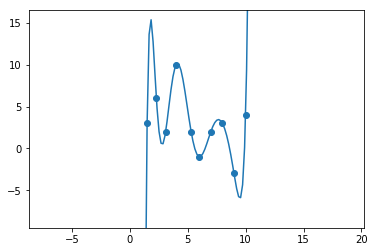

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def evalp(x,c):
    d = len(c)-1
    p = c[0]
    xp = 1.0
    for i in range(d):
        xp *= x
        p += c[i+1]*xp
    return p

def buildVmatrix(x):
    d = len(x)-1
    A = np.zeros((len(x),d+1))
    for i in range(len(x)):
        for j in range(d+1):
            A[i,j] = x[i]**j
    return A

def PolynomialInterpolation(x,y):
    A = buildVmatrix(x)
    c = np.linalg.solve(A,y)
    return c

def drawPolynomial(x,y,c,N,xmin,xmax):
    delta = 2.0*(xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta - N*delta/4.0
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-1.2*deltax, xmax+1.2*deltax)
    ymin = min(y)
    ymax = max(y)
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()


x = [1.5,2.3,3.1,4.0,5.3,6.0,7.0,8.0,9.0,10.0]
y = [3.0,6.0,2.0,10.0,2.0,-1.0,2.0,3.0,-3.0,4.0] 
d = len(x)-1

A = buildVmatrix(x)
print(A)

c = PolynomialInterpolation(x,y)
print(c)

erro = np.linalg.norm(A.dot(c)-y)**2
print(erro)


drawPolynomial(x,y,c,100,min(x),max(x))



[[   0.            0.65895643    3.27919064    9.40048373   25.38346833
    37.90399408   60.95081637   90.41779541  126.63516367  169.88686233]
 [   0.65895643    0.            0.65895643    3.78108185   14.48494121
    23.82698193   42.01755526   66.31924848   97.11157062  134.71434375]
 [   3.27919064    0.65895643    0.            0.8624157     6.9458091
    13.36546808   26.99702526   46.37582909   71.94749266  104.07790129]
 [   9.40048373    3.78108185    0.8624157     0.            2.01772897
     5.54517744   14.48494121   28.66815151   48.64775373   74.8598955 ]
 [  25.38346833   14.48494121    6.9458091     2.01772897    0.
     0.48669337    3.78108185   11.28173069   23.82698193   42.01755526]
 [  37.90399408   23.82698193   13.36546808    5.54517744    0.48669337
     0.            1.09861229    5.54517744   14.48494121   28.66815151]
 [  60.95081637   42.01755526   26.99702526   14.48494121    3.78108185
     1.09861229    0.            1.09861229    5.54517744   14.4849

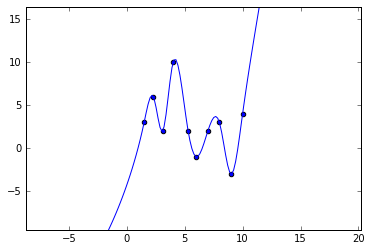

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

def RBF(r,eps):
#    return math.exp(-r*eps)
#    return 1.0/(1.0+(eps*eps*r*r))
#    return 1.0/math.sqrt((1.0+(eps*eps*r*r)))
#    return math.sqrt((1.0+(eps*eps*r*r)))
    return r**2*math.log(r+eps)

def evalRBF(x0,x,w,eps):
    n = len(x)
    p = 0.0
    for i in range(n):
        r = np.linalg.norm(x0-x[i])
        p += w[i]*RBF(r,eps)
    return p

def buildRBFmatrix(x,eps):
    n = len(x)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            r = np.linalg.norm(x[i]-x[j])
            A[i,j] = RBF(r,eps)
            A[j,i] = A[i,j]
    return A

def RBFInterpolation(x,y,eps):
    A = buildRBFmatrix(x,eps)
    w = np.linalg.solve(A,y)
    return w

def drawRBF(x,y,w,N,xmin,xmax,eps):
    delta = 2.0*(xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta - N*delta/4.0
        px[i] = xp
        py[i] = evalRBF(xp,x,w,eps)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-1.2*deltax, xmax+1.2*deltax)
    ymin = min(y)
    ymax = max(y)
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.5,2.3,3.1,4.0,5.3,6.0,7.0,8.0,9.0,10.0]
y = [3.0,6.0,2.0,10.0,2.0,-1.0,2.0,3.0,-3.0,4.0] 

eps = 2.0

A = buildRBFmatrix(x,eps)
print(A)

w = RBFInterpolation(x,y,eps)
print(w)

drawRBF(x,y,w,100,min(x),max(x),eps)


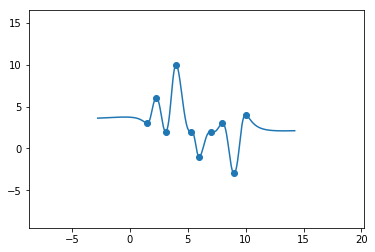

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

def evalSheppard(x,xp,yp,k):
    n  = len(xp)
    s  = np.zeros(n)
    wt = 0.0
    for i in range(n):
        if (x == xp[i]):
            return yp[i]
        s[i] = 1.0/((np.linalg.norm(x-xp[i])))**k
        wt += s[i]
    p = 0.0
    for i in range(n):
        p += yp[i]*(s[i]/wt)
    return p

def drawSheppard(x,y,k,N,xmin,xmax):
    delta = 2.0*(xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta - N*delta/4.0
        px[i] = xp
        py[i] = evalSheppard(xp,x,y,k)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-1.2*deltax, xmax+1.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.5,2.3,3.1,4.0,5.3,6.0,7.0,8.0,9.0,10.0]
y = [3.0,6.0,2.0,10.0,2.0,-1.0,2.0,3.0,-3.0,4.0] 


drawSheppard(x,y,2,500,min(x),max(x))
